#Question 2. Clustering

#Loading data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from functools import reduce

%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

#Instaling Kmodes library
!pip install KModes
from kmodes.kmodes import KModes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading dataset
bank_df = pd.read_csv('/content/drive/MyDrive/Datasets/bankmarketing.csv')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Examining the dataset**

In [4]:
#Establishing shape of dataset
print(bank_df.shape)

(41188, 21)


In [5]:
#Checking datatypes
print(bank_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Descriptive statistics
print(bank_df.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

# Data pre-processing

**Subsetting a dataset**

In [21]:
#Subsetting a dataset
customer = bank_df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
customer.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [20]:
#Checking subsetted dataset shape
customer.shape

(41188, 4)

**Converting age into new categorical variable**

In [9]:
#Converting age into new categorical variable
customer['age_bin'] = pd.cut(customer['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
customer.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [10]:
#Checking subsetted dataset shape
customer.shape

(41188, 12)

**Missing values**

In [11]:
#Identifying missing values
customer.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age_bin        0
dtype: int64

In [12]:
#Countign number of distinct elements
customer.nunique()

age            78
job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
age_bin         9
dtype: int64

**Converting categorical features into numerical features**

In [13]:
#Converting categorical features into numerical features
converter = preprocessing.LabelEncoder()
customer = customer.apply(converter.fit_transform)
customer.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,39,3,1,0,0,0,0,1,6,1,1,4
1,40,7,1,3,1,0,0,1,6,1,1,4
2,20,7,1,3,0,2,0,1,6,1,1,2
3,23,0,1,1,0,0,0,1,6,1,1,2
4,39,7,1,3,0,0,2,1,6,1,1,4


**Dividing market_df into label and feature sets**

In [14]:
#Data splitting
X = customer.drop('age',axis = 1) # Features
Y = customer['age'] # Labels
print(type(X))
print(type(Y))

print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(41188, 11)
(41188,)


###### **Normalizing numerical features so that each feature has mean 0 and variance 1**

In [15]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

X_scaled

array([[-0.20157925, -0.2837415 , -1.75392459, ..., -0.71883445,
         0.19262207,  1.44931678],
       [ 0.91122681, -0.2837415 , -0.34973033, ..., -0.71883445,
         0.19262207,  1.44931678],
       [ 0.91122681, -0.2837415 , -0.34973033, ..., -0.71883445,
         0.19262207, -0.42086899],
       ...,
       [ 0.35482378, -0.2837415 ,  1.05446393, ..., -1.43436815,
         0.19262207,  1.44931678],
       [ 1.46762984, -0.2837415 ,  0.58639918, ..., -1.43436815,
         0.19262207,  0.5142239 ],
       [ 0.35482378, -0.2837415 ,  0.58639918, ..., -1.43436815,
        -2.56309793,  3.31950256]])

### Dimentionality Reduction using PCA



In [16]:
#Implementing PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.14535091 0.11945341]
Total variance explained by the n_components:  0.2648043183399457


#Visualisation

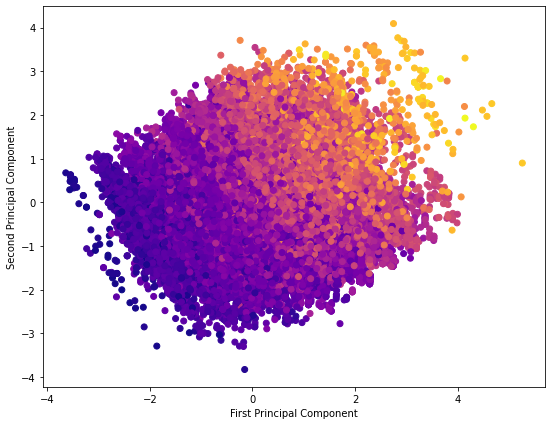

In [23]:
#Visualize PCA on customer
plt.figure(figsize = (9,7))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

##Elbow Plot Method



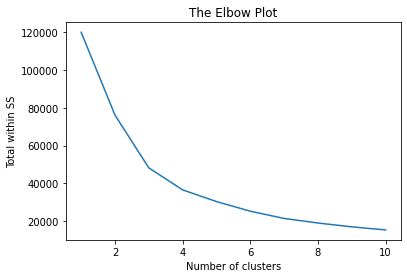

In [18]:
#Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Total within SS')
plt.show()

##Visualising clusters

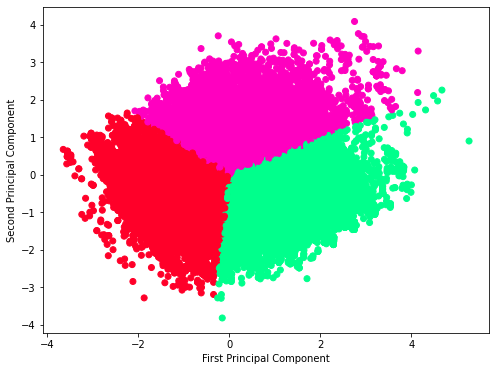

In [28]:
# Implementing K-Means CLustering on customer and visualizing clusters
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_pca)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='gist_rainbow')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()